In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
import pandas_profiling
np.random.seed(0)

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes=True)

In [3]:
iris=load_iris()
print(iris)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

In [4]:
#Creating a dataframe
df=pd.DataFrame(iris.data,columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
#Adding a new column for the species name
df['Species']=pd.Categorical.from_codes(iris.target,iris.target_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### Pandas Profiling

In [6]:
report = pandas_profiling.ProfileReport(df)
#covert profile report as html file
report.to_file("Iris.html")

### Data Exploration

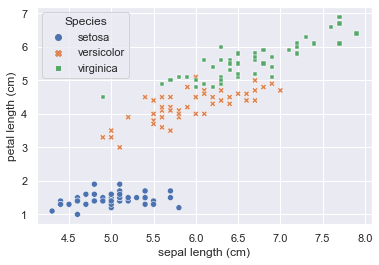

In [7]:
sns.scatterplot(x="sepal length (cm)",y="petal length (cm)",data=df,hue="Species",style="Species")

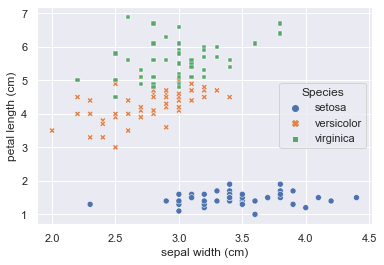

In [8]:
sns.scatterplot(x="sepal width (cm)",y="petal length (cm)",data=df,hue="Species",style="Species")

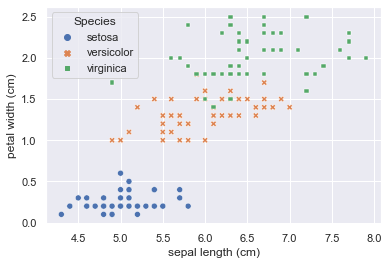

In [9]:
sns.scatterplot(x="sepal length (cm)",y="petal width (cm)",data=df,hue="Species",style="Species")

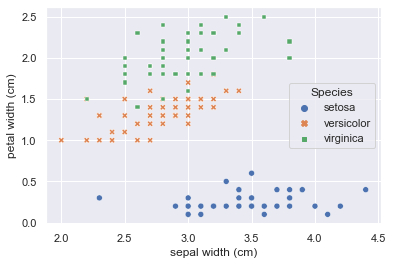

In [10]:
sns.scatterplot(x="sepal width (cm)",y="petal width (cm)",data=df,hue="Species",style="Species")

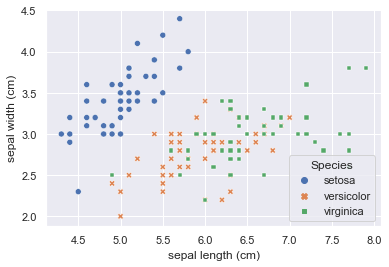

In [11]:
sns.scatterplot(x="sepal length (cm)",y="sepal width (cm)",data=df,hue="Species",style="Species")

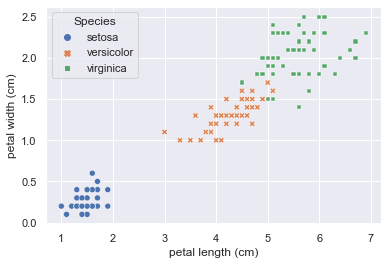

In [12]:
sns.scatterplot(x="petal length (cm)",y="petal width (cm)",data=df,hue="Species",style="Species")

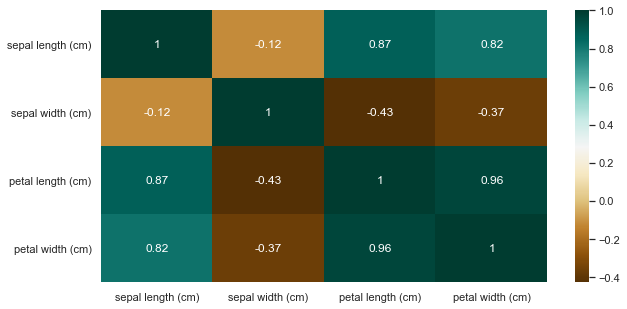

In [13]:
plt.subplots(figsize=(10,5))
sns.heatmap(df.corr(),cmap="BrBG",annot=True)

In [14]:
#Creating training and testing data
df['is_train']=np.random.uniform(0,1,len(df))<=.75

#View top 5 rows
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species,is_train
0,5.1,3.5,1.4,0.2,setosa,True
1,4.9,3.0,1.4,0.2,setosa,True
2,4.7,3.2,1.3,0.2,setosa,True
3,4.6,3.1,1.5,0.2,setosa,True
4,5.0,3.6,1.4,0.2,setosa,True


In [15]:
#Creating dataframes with test rows and training rows
train,test=df[df['is_train']==True],df[df['is_train']==False]

#Displaying no. of observations for test and training dataframe
print('Number of observations in training data:',len(train))
print('Number of observations in test data:',len(test))

Number of observations in training data: 118
Number of observations in test data: 32


In [16]:
#Create a list of feature column's names
features =df.columns[:4]
features

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

In [17]:
#Converting each species name into digits
y=pd.factorize(train['Species'])[0]
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [18]:
#Creating a random forest Classifier
clf=RandomForestClassifier(n_jobs=2,random_state=0)
#Training the classifier
clf.fit(train[features],y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=2,
                       oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [19]:
#Apply the trained Classifier to the rest
clf.predict(test[features])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 2, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [20]:
#Viewing the predicted probabilities of first 10 observations
clf.predict_proba(test[features])[0:10]

array([[1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [0.95, 0.05, 0.  ],
       [1.  , 0.  , 0.  ],
       [0.99, 0.01, 0.  ],
       [1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ]])

In [21]:
#mapping names for the plants for each predicted plant class
preds=iris.target_names[clf.predict(test[features])]

#Viewing the predicted species for first 15 observations
preds[0:15]

array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'versicolor', 'versicolor'], dtype='<U10')

In [22]:
#Viewing actual species for first 15 observations
test['Species'].head(15)

7         setosa
8         setosa
10        setosa
13        setosa
17        setosa
18        setosa
19        setosa
20        setosa
21        setosa
23        setosa
27        setosa
31        setosa
38        setosa
52    versicolor
66    versicolor
Name: Species, dtype: category
Categories (3, object): [setosa, versicolor, virginica]

In [23]:
#Creating confusion matrix
pd.crosstab(test['Species'],preds,rownames=['Actual Species'],colnames=['Predictes Species'])

Predictes Species,setosa,versicolor,virginica
Actual Species,,,
setosa,13,0,0
versicolor,0,5,2
virginica,0,0,12


In [24]:
#Making predictions
preds=iris.target_names[clf.predict([[5.0,3.6,1.4,2.0],[5.0,3.6,1.4,2.0]])]

In [25]:
preds

array(['setosa', 'setosa'], dtype='<U10')